# EXPLORATORY DATA ANALYSIS
Extracción de características e información importante de datasets

Información obtenida del corpus(completo):
 - #Preguntas
 - #Vocabulario
 - #Palabras (términos)
 - #Prom-Palabras: Promedio palabras por pregunta
 - WordClouds de palabras frecuentes (corpus)
 
Información obtenida de cada clase:
 - #Preguntas
 - #Vocabulario
 - #Palabras (terminos)
 - #Prom-Palabras: Promedio palabras por pregunta (por clase)
 - Gráficas comparativas
 - WordClouds de palabras frecuentes (por clase)

**NOTA:** Para el análisis se ha considerado realizar un preprocesamiento básico del corpus de AFIP, teniendo en cuenta: 
 - Mantenimiento de palabras y dígitos y simbolos básicos (/ y % - fecha y porc)
 - Conversión de texto a minúscula
 - Eliminación de acentos
 - Corrección de palabras incorrectas 
 

##Librerías necesarias

In [1]:
import re
import pandas as pd
import numpy as np
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt 
#Bibliotecas para WordCloud 
from nltk.probability import FreqDist
from wordcloud import WordCloud

## Configuraciones para la Ejecución

In [2]:
#Setear DS_FILE para cada dataset a analizar, por ejemplo:
#DS1-->"DS1_usuario_afip.csv" (Corpus AFIP - completo)
#DS2-->"DS2-train_usuario.csv"
#DS3-->"DS2-test_afip.csv"

DS_FILE = "DS1_usuario_afip.csv"


## Carga de Datos y Preprocesamiento

In [3]:
#FUNCIONES DE PREPROCESAMIENTO: 
#  - Mantenimiento de palabras y dígitos
correccion_palabras = { 'aherir' : 'adherir', 'aniticipo' : 'anticipo', 'baje' : 'baja','caracterísiticas' : 'caracteristicas',
                        'caragas' : 'cargas', 'caratacterísticas' : 'caracteristicas','condiminios' : 'condominios',
                        'constribuyentes' : 'contribuyentes','deden' : 'deben','incripto' : 'inscripto', 'infromé' : 'informe',
                        'inregular' : 'irregular', 'inscriibirme' : 'inscribirme','monostributista' : 'monotributista',
                        'monotribustistas' : 'monotributistas', 'monotributisa' : 'monotributista',
                        'monotributistas' : 'monotributistas','opraciones' : 'operaciones', 'parámentros' : 'parametros',
                        'permanezo' : 'permanezco', 'porciento' : 'por ciento','porqué' : 'por que','previsioanl' : 'previsional',
                        'qié' : 'que', 'registo' : 'registro','reitegren' : 'reintegren', 'requisistos' : 'requisitos',
                        'resposable' : 'responsable', 'semetre' : 'semestre','siginifica' : 'significa',
                        'situadios' : 'situados','solitar' : 'solicitar','trancurrir' : 'transcurrir' }
def procesamiento(texto):
     #Eliminar TODO menos: \w = alphanum y ¿?%/
    texto = re.sub(r'[^\w %/]', "", texto)  
    #Texto a minúscula
    texto = texto.lower()  
    #Reescritura de palabras mal escritas
    texto = ''.join(correccion_palabras[w] if w in correccion_palabras else w for w in re.split(r'(\W+)', texto)) 
    #Eliminar acentos
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn') 
    return texto
    
def procesar_sentencias(sentencias):
    sentencias_limpias = []
    for s in sentencias:
        clean = procesamiento(s)
        sentencias_limpias.append(clean)
    return sentencias_limpias

In [4]:
#LECTURA Y PROCESAMIENTO DEL DATASET

def load_dataset(filename):
    #df = pd.read_csv(filename, encoding = "utf-8", names = ["IUCA","Texto", "Etiqueta"], header=0)
    df = pd.read_csv(filename, encoding = "utf-8", header=0)
    print('LECTURA DEL ARCHIVO: {}'.format(filename))
    print(df.head())
    sentencias = list(df["Texto"])
    etiquetas = list(df["Etiqueta"])
    return (sentencias, etiquetas)

DF_DATA = pd.DataFrame(columns=["preguntas","etiquetas"])
DF_DATA['preguntas'], DF_DATA['etiquetas'] =  load_dataset(DS_FILE)


#VER SI TERMINO HACIENDO PREPROCESAMIENTO SIMPLE
print('\nPREPROCESAMIENTO DE PREGUNTAS - DATASET:{}\n'.format(DS_FILE))
print("Datos a procesar:")
print(*(DF_DATA['preguntas'][:5]), sep="\n", end="\n...\n")
DF_DATA['preguntas'] = procesar_sentencias(DF_DATA['preguntas'])
print("Datos procesados:")
print(*(DF_DATA['preguntas'][:5]), sep="\n", end="\n...\n")
print('\nFIN DE PREPROCESAMIENTO - DATASET:{}'.format(DS_FILE))



LECTURA DEL ARCHIVO: DS1_usuario_afip.csv
   IUCA                                              Texto Etiqueta
0     0  ¿Puedo darme de baje por el tiempo en que no r...    si_no
1     0  Si dejo de trabajar por un tiempo, ¿puedo darm...    si_no
2     0  ¿Puedo dar de baja mi monotributo y transcurri...    si_no
3     0  ¿Es obligatorio seguir inscripto en el régimen...    si_no
4     0  ¿Qué sucede si me doy de baja y luego retomo m...   manera

PREPROCESAMIENTO DE PREGUNTAS - DATASET:DS1_usuario_afip.csv

Datos a procesar:
¿Puedo darme de baje por el tiempo en que no realice la actividad luego darme de alta cuando la retome?
Si dejo de trabajar por un tiempo, ¿puedo darme de baja y luego volver a darme de alta?
¿Puedo dar de baja mi monotributo y transcurrido un período de tiempo, darme de alta nuevamente?
¿Es obligatorio seguir inscripto en el régimen si dejo de ejercer mi actividad?
¿Qué sucede si me doy de baja y luego retomo mi actividad?
...
Datos procesados:
puedo darme de baja

## Conteo de palabras y caracteres: **SENTENCIAS**
Primero debemos contar la cantidad de palabras por sentencias. La cantidad de caracteres es opcional.

In [5]:
#Características de Sentencias:
#  - Longitud de sentencia (cantidad de caracteres)
#  - Cantidad de palabras (terminos)
DF_DATA['caracteres'] = DF_DATA['preguntas'].astype(str).apply(len)
DF_DATA['palabras'] = DF_DATA['preguntas'].apply(lambda x: len(x.split(' ')))
DF_DATA.head(10)

,preguntas,etiquetas,caracteres,palabras
0,puedo darme de baja por el tiempo en que no re...,si_no,101,20
1,si dejo de trabajar por un tiempo puedo darme ...,si_no,84,18
2,puedo dar de baja mi monotributo y transcurrid...,si_no,93,16
3,es obligatorio seguir inscripto en el regimen ...,si_no,77,13
4,que sucede si me doy de baja y luego retomo mi...,manera,56,12
5,me tengo que dar de alta de nuevo si me doy de...,si_no,79,18
6,puedo suspender mi inscripcion hasta que retom...,si_no,60,9
7,se puede interrumpir la inscripcion del monotr...,si_no,91,14
8,puedo quedar excluido del monotributo,si_no,37,5
9,por que puedo quedar excluido del monotributo,razon,45,7


## Extracción de características: **CORPUS**
- #Preguntas
- #Vocabulario
- #Palabras (terminos)
- #Prom-Palabras: Promedio palabras por pregunta (corpus)

In [6]:
#EXTRACCIÓN DE CARACTERÍSTICAS DEL CORPUS:
# - #Preguntas
# - #Vocabulario
# - #Palabras (terminos)
# - #Prom-Palabras: Promedio palabras por pregunta (corpus)

vect = CountVectorizer(token_pattern='[\w\/\%]+').fit(DF_DATA['preguntas'])
#vect = CountVectorizer().fit(DF_DATA['preguntas'])

DF_CORPUS = pd.DataFrame(columns=["preguntas","vocabulario","palabras", "prom-palabras"])

#cantidad de preguntas
cant_preg = int(DF_DATA.shape[0])
#tamaño de vocabulario
tam_vocab = len(vect.vocabulary_)
#cantidad de palabras
cant_palabras = DF_DATA['palabras'].sum()
#avg-palabras: promedio de palabras por pregunta
avg_palabras = int(cant_palabras / cant_preg)

DF_CORPUS = DF_CORPUS.append({'preguntas':cant_preg, 'vocabulario':tam_vocab, 'palabras':cant_palabras,'prom-palabras':avg_palabras},ignore_index=True)
print("CARACTERÍSTICAS DEL CORPUS")
DF_CORPUS.head()


CARACTERÍSTICAS DEL CORPUS


,preguntas,vocabulario,palabras,prom-palabras
0,1385,1291,16784,12


### Guardar características del Corpus (Archivo Excel)

In [7]:
#Guardar Excel con todos los resultados de CORPUS
#from openpyxl.workbook import Workbook
DF_DATA.to_excel("DF_CORPUS_datos.xlsx", index=False)
DF_CORPUS.to_excel("DF_CORPUS.xlsx", index=False)

##WordCloud de Palabras Frecuentes: **CORPUS**
Imagen WordCloud será guardada en el archivo: *corpus_wc.png*

Top 100 más comunes: {'que': 662, 'monotributo': 392, 'si': 301, 'como': 255, 'por': 207, 'monotributista': 203, 'actividad': 181, 'puedo': 175, 'debo': 173, 'recategorizacion': 136, 'puede': 105, 'pago': 101, 'tengo': 99, 'cuando': 98, 'caso': 91, 'hacer': 89, 'inscripto': 80, 'pagar': 74, 'baja': 72, 'social': 71, 'realizar': 69, 'responsable': 67, 'fiscal': 62, 'cuales': 60, 'oficio': 60, 'regimen': 58, 'debe': 57, 'domicilio': 55, 'deben': 52, 'comprobantes': 52, 'tener': 51, 'trabajo': 50, 'cuenta': 49, 'categoria': 45, 'cual': 45, 'vez': 43, 'ingresos': 43, 'desde': 42, 'persona': 42, 'iva': 39, 'otra': 37, 'siendo': 37, 'actividades': 37, 'tiempo': 36, 'donde': 36, 'obra': 36, 'parametros': 35, 'tiene': 34, 'cuit': 34, 'estoy': 33, 'cambio': 33, 'condicion': 33, 'alta': 32, 'pueden': 32, 'tramite': 32, 'impuesto': 31, 'operaciones': 31, 'momento': 30, 'posible': 29, 'realiza': 29, 'afip': 28, 'cuanto': 28, 'facturas': 28, 'tipo': 28, 'credencial': 28, 'mis': 27, 'servicio': 27, 

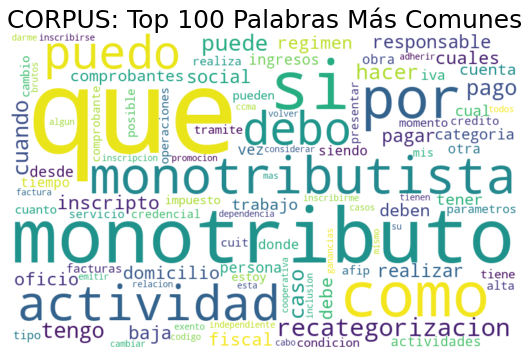

In [8]:
#WORDCLOUD DE PALABRAS FRECUENTES - CORPUS

irrelevantes = ['el', 'la', 'los', 'las', 'de', 'es', 'se', 'me','no', 'del','en','hay','al','con','para','una', 'un', 'mi','unos','unas',
              'soy','son','ser','monotributistas']

palabrasCorpus = []
for preg in DF_DATA['preguntas']:
    tokens = preg.split(' ')
    #print(tokens)
    for tk in tokens:
        if tk not in irrelevantes and len(tk)>1:
            palabrasCorpus.append(tk)

nroP = 100
mostcommon = dict(FreqDist(palabrasCorpus).most_common(nroP))
print('Top {} más comunes: {}'.format(len(mostcommon), mostcommon))
wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=0).fit_words(mostcommon)
fig = plt.figure(figsize=(8,6), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
title = 'CORPUS: Top '+ str(nroP)+ ' Palabras Más Comunes'
plt.title(title, fontsize=25)
plt.tight_layout(pad=0)
plt.savefig("corpus_wc.png")
plt.show();

##Extracción de características: **CLASES**
- #Preguntas
- #Vocabulario
- #Palabras (terminos)
- Average Terms: Promedio de palabras por pregunta (clases)

In [9]:
#EXTRACCIÓN DE CARACTERÍSTICAS DE CADA CLASE:
# - #Preguntas
# - #Vocabulario
# - #Palabras (terminos)
# - Average Terms: Promedio words por pregunta 

DF_CLASES = pd.DataFrame(columns=["clase", "preguntas","vocabulario", "palabras", "prom-palabras", "lista-preguntas"])

listaClases = np.unique(DF_DATA['etiquetas'])

for clase in listaClases:
    #Cantidad de Preguntas
    cant_preg = DF_DATA.groupby(['etiquetas']).get_group(clase)['preguntas'].count()
    #Tamaño de Vocabulario
    preguntas_clase = DF_DATA.groupby(['etiquetas'])['etiquetas','preguntas'].get_group(clase)
    tam_vocab_clase = len(CountVectorizer().fit(preguntas_clase['preguntas']).vocabulary_)
    #Cantidad de Palabras
    cant_palabras = DF_DATA.groupby(['etiquetas']).get_group(clase)['palabras'].sum()
    #Average Terms por Pregunta
    prom_palabras = int(cant_palabras/cant_preg)
    #Registrar información
    DF_CLASES = DF_CLASES.append({'clase':clase, 'preguntas':cant_preg,'vocabulario':tam_vocab_clase,'palabras':cant_palabras, 'prom-palabras':prom_palabras, 'lista-preguntas':list(preguntas_clase['preguntas'])},ignore_index=True)

print("CARACTERÍSTICAS DE CADA CLASE")
DF_CLASES.head(10)

CARACTERÍSTICAS DE CADA CLASE


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


,clase,preguntas,vocabulario,palabras,prom-palabras,lista-preguntas
0,cantidad,7,32,68,9,"[cuantos empleados puedo tener, cual es la can..."
1,definicion,40,94,285,7,"[que se paga en el monotributo, que significa ..."
2,entidad,4,16,36,9,[cuales son las entidades bancarias habilitada...
3,manera,300,582,3960,13,[que sucede si me doy de baja y luego retomo m...
4,procedimiento,190,299,2176,11,"[como me doy de baja del monotributo, como es ..."
5,razon,96,186,909,9,[por que puedo quedar excluido del monotributo...
6,referencia,85,183,931,10,"[cuanto tengo que pagar de monotributo, se pag..."
7,si_no,539,845,6847,12,[puedo darme de baja por el tiempo en que no r...
8,temporal,115,244,1493,12,[si me di de baja el monotributo por que ya no...
9,ubicacion,9,30,79,8,"[donde debo solicitar la cuit, si quiero solic..."


### Guardar características del Corpus (Archivo Excel)
Nombre del archivo: *DF_CLASES.xlsx*

In [10]:
#Guardar Excel con todos los resultados de CLASES
DF_CLASES.to_excel("DF_CLASES.xlsx", index=False)

##Distribuciones de Características por Clase

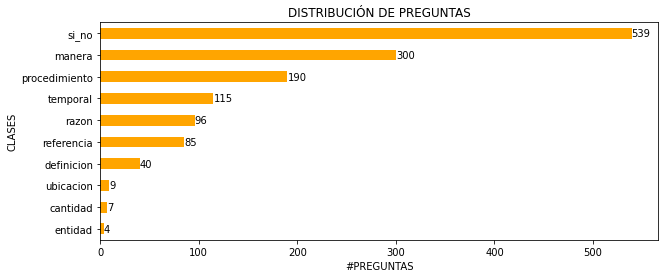

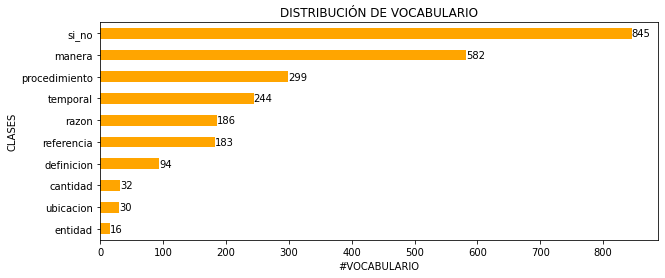

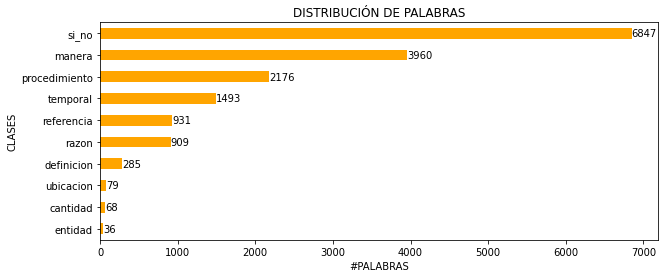

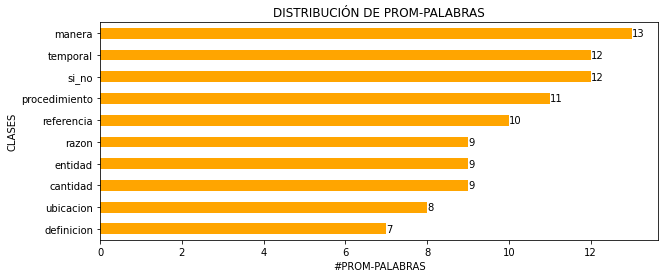

In [13]:
#CLASES: GRÁFICAS COMPARATIVAS 
DF_CLASES.index = DF_CLASES['clase']
tipoGraficas = ['preguntas','vocabulario','palabras','prom-palabras']

for tipo in tipoGraficas:
    datos_grafica = DF_CLASES[tipo].sort_values(ascending=True)
    datos_grafica.plot(kind='barh',figsize=(10,4), color='orange')
    plt.title('DISTRIBUCIÓN DE '+tipo.upper())
    plt.xlabel('#'+tipo.upper())
    plt.ylabel('CLASES')
    for index, value in enumerate(datos_grafica):
        plt.text(value, index, str(value), verticalalignment='center')
    plt.savefig("dist_"+str(tipo)+".png")
    plt.show();
    

##WordCloud de Palabras Frecuentes: **CLASES**
Imagen WordCloud de cada clase será guardada en el archivo: *'nombreCLASE'_wc.png*

Top 15 más comunes: {'cual': 5, 'precio': 4, 'empleados': 3, 'tener': 3, 'que': 3, 'por': 3, 'maximo': 3, 'puedo': 2, 'cantidad': 2, 'monotributista': 2, 'unidad': 2, 'venta': 2, 'cuantos': 1, 'maxima': 1, 'pueden': 1}


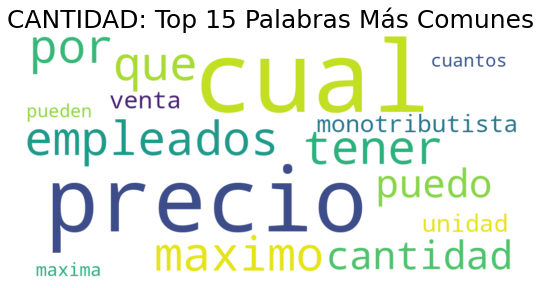

Top 15 más comunes: {'que': 31, 'monotributo': 8, 'fiscal': 7, 'ingresos': 6, 'brutos': 6, 'cual': 6, 'recategorizacion': 6, 'significa': 5, 'diferencia': 5, 'domicilio': 5, 'unidad': 4, 'explotacion': 4, 'actividad': 4, 'economica': 4, 'entre': 4}


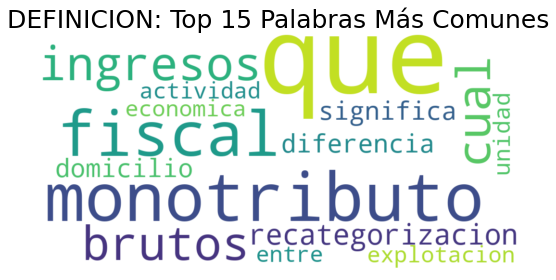

Top 9 más comunes: {'pago': 4, 'vep': 4, 'cuales': 3, 'entidades': 2, 'bancarias': 2, 'habilitadas': 2, 'donde': 1, 'bancos': 1, 'habilitados': 1}


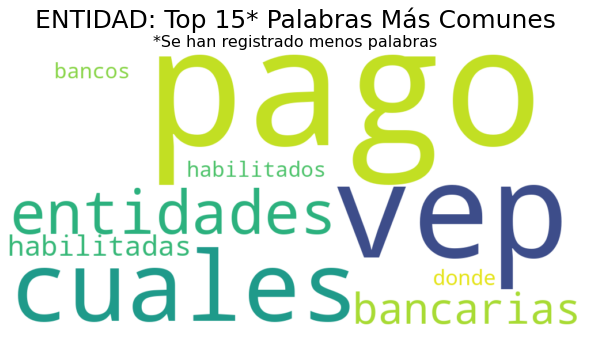

Top 15 más comunes: {'que': 228, 'como': 115, 'si': 82, 'monotributo': 71, 'actividad': 52, 'tengo': 39, 'debo': 37, 'por': 37, 'recategorizacion': 35, 'parametros': 30, 'monotributista': 26, 'cuando': 24, 'puedo': 23, 'hacer': 22, 'fiscal': 22}


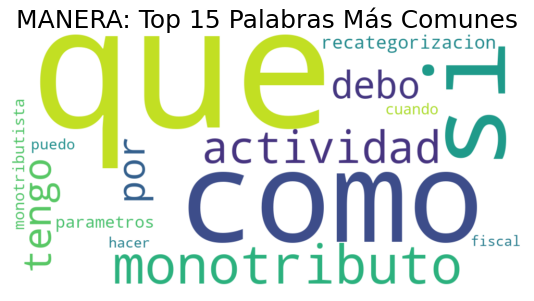

Top 15 más comunes: {'como': 110, 'que': 82, 'monotributo': 50, 'hacer': 39, 'si': 36, 'recategorizacion': 31, 'pago': 30, 'social': 29, 'debo': 27, 'obra': 21, 'cambio': 20, 'tramite': 19, 'actividad': 18, 'caso': 17, 'pasos': 16}


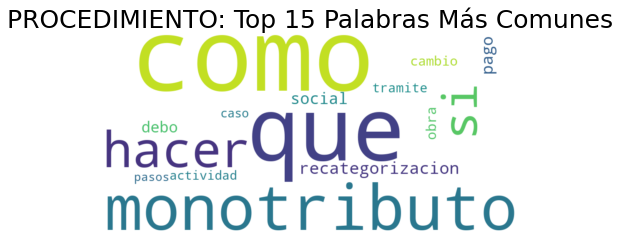

Top 15 más comunes: {'que': 67, 'monotributo': 22, 'casos': 21, 'cuales': 15, 'cuando': 13, 'recategorizacion': 10, 'encuentran': 10, 'cumplir': 10, 'puedo': 9, 'electronico': 9, 'exceptuados': 8, 'debo': 8, 'pago': 8, 'actividades': 8, 'quienes': 8}


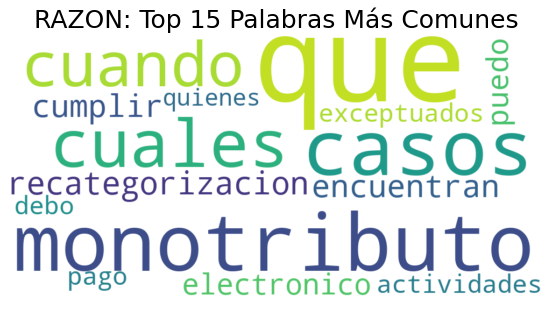

Top 15 más comunes: {'que': 59, 'comprobantes': 25, 'donde': 18, 'tipo': 16, 'social': 15, 'debo': 13, 'si': 13, 'factura': 13, 'monotributista': 12, 'categoria': 11, 'emitir': 11, 'consultar': 10, 'letra': 9, 'monotributo': 8, 'por': 8}


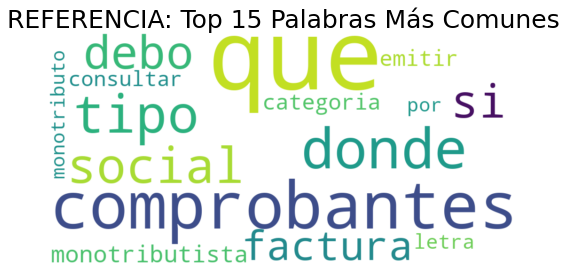

Top 15 más comunes: {'monotributo': 185, 'si': 139, 'monotributista': 125, 'por': 117, 'que': 117, 'puedo': 115, 'actividad': 95, 'puede': 88, 'debo': 66, 'inscripto': 46, 'caso': 39, 'responsable': 38, 'iva': 34, 'tengo': 31, 'pagar': 31}


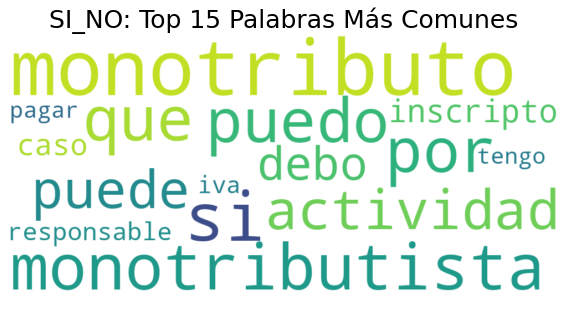

Top 15 más comunes: {'que': 71, 'monotributo': 48, 'cuando': 48, 'baja': 29, 'tiempo': 28, 'si': 25, 'cuanto': 22, 'por': 21, 'desde': 18, 'partir': 18, 'recategorizacion': 18, 'debo': 15, 'pagar': 15, 'vez': 14, 'monotributista': 14}


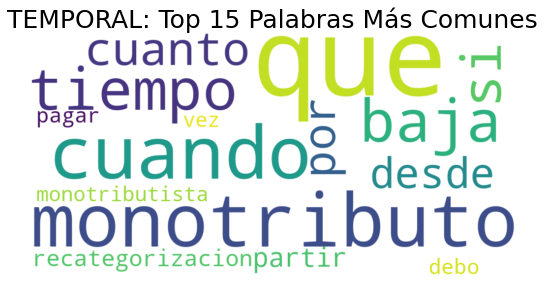

Top 15 más comunes: {'cuit': 9, 'donde': 6, 'debo': 6, 'solicitar': 5, 'que': 4, 'si': 3, 'ir': 3, 'quiero': 2, 'lugar': 2, 'tramitar': 2, 'obtener': 2, 'debe': 2, 'manera': 1, 'personal': 1, 'hacerlo': 1}


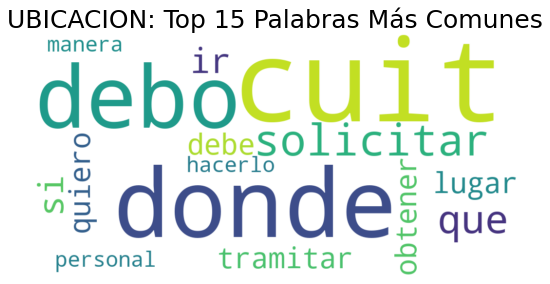

In [12]:
#WORDCLOUD PARA CADA CLASE

lista_preguntas = DF_CLASES['lista-preguntas']
listaClases = DF_CLASES['clase']

irrelevantes = ['el', 'la', 'los', 'las', 'de', 'es', 'se', 'me','no', 'del','en','hay','al','con','para','una', 'un', 'mi',
              'unos','unas','soy','son','ser','monotributistas']

for clase in listaClases:
    preguntas = lista_preguntas[clase]
    palabras = []
    for preg in preguntas:
        tokens = preg.split(' ')
        #print(tokens)
        for tk in tokens:
            if tk not in irrelevantes and len(tk)>1:
                palabras.append(tk)
    
    nroP = 15
    mostcommon = dict(FreqDist(palabras).most_common(nroP))
    print('Top {} más comunes: {}'.format(len(mostcommon), mostcommon))
    wordcloud = WordCloud(width=1000, height=500, background_color='white', random_state=3).fit_words(mostcommon)
    fig = plt.figure(figsize=(8,8), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    title = clase.upper() + ': Top '+ str(nroP) + ' Palabras Más Comunes'   
    plt.title(title,fontsize=25) 
    if len(mostcommon)<nroP:
        title = clase.upper() + ': Top '+ str(nroP) + '* Palabras Más Comunes'
        subtitle = '*Se han registrado menos palabras'
        plt.title(subtitle,fontsize=16)
        plt.suptitle(title,fontsize=25, y=0.83)
        
    plt.tight_layout(pad=0)
    plt.savefig("wc_"+str(clase)+".png")
    plt.show();
    


#    mostcommon = FreqDist(palabras).most_common(20)
#    palabras_comunes = ""
#    for p in mostcommon:
#        palabras_comunes = palabras_comunes + " " + p[0]

***>>FIN DE EXPLORATORY DATA ANALYSIS***